In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [273]:
df=pd.read_csv("Housing.csv")

In [274]:
df.shape

(545, 13)

In [275]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [276]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [277]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [278]:
df.apply(lambda x:len(x.unique()))

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

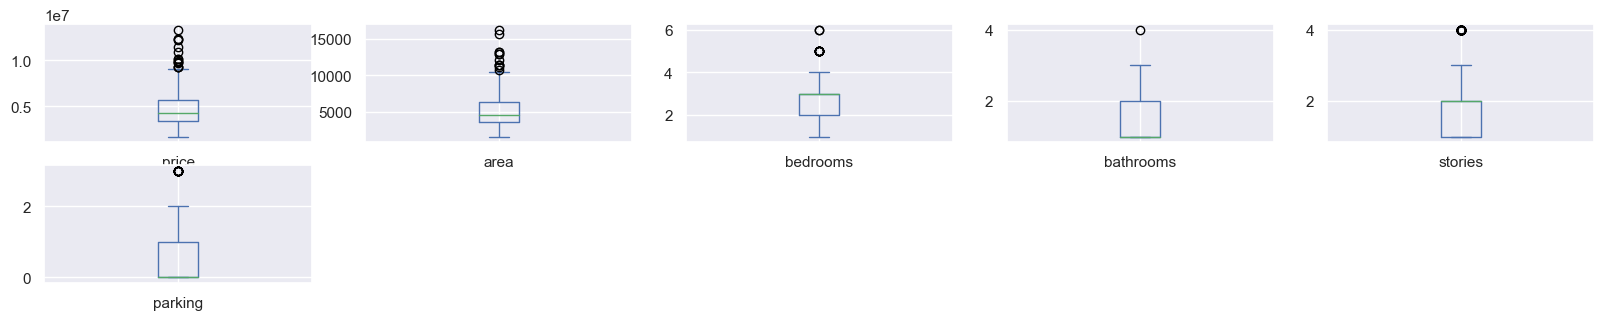

In [279]:
df.plot(kind="box", subplots=True, layout=(10,5), figsize=(20,18))
plt.show()

In [280]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the IQR for each numeric column
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1


def replace_outliers(df):
    for col in numeric_cols:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Replace outliers with the IQR
df = replace_outliers(df)

3.0    300
2.0    136
4.0     95
4.5     12
1.0      2
Name: bedrooms, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

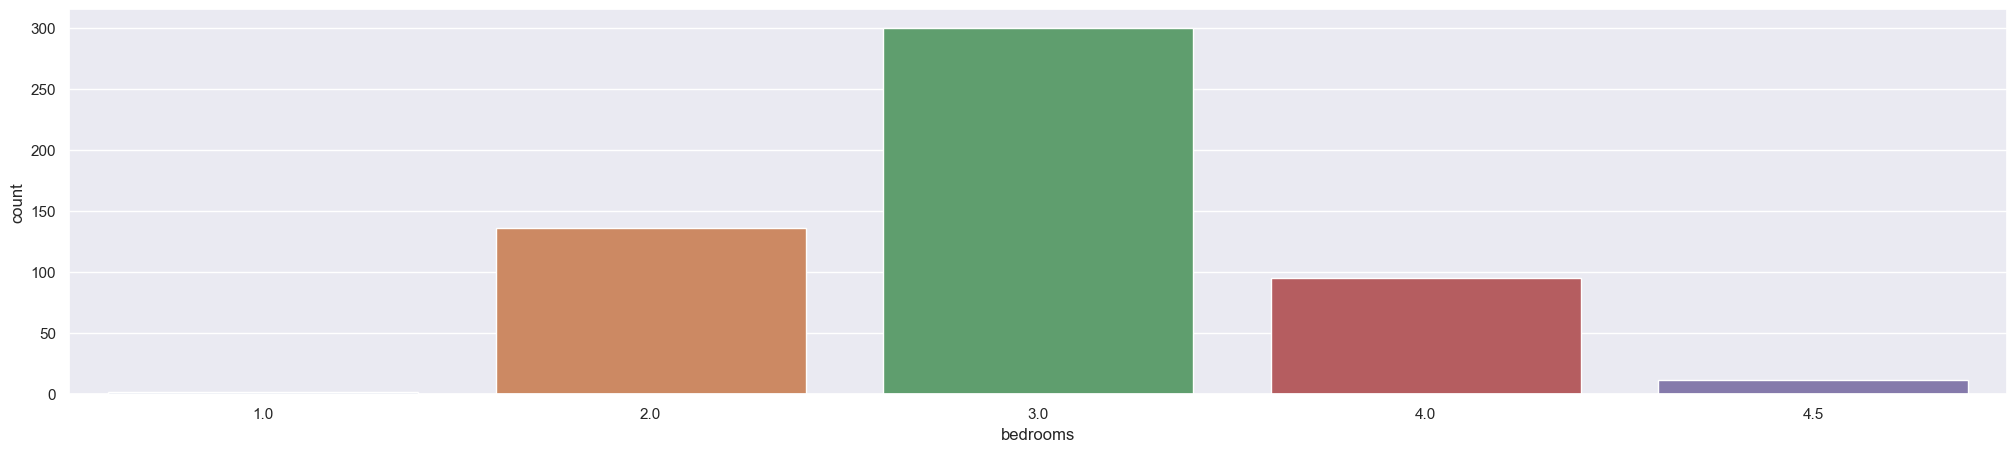

In [281]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.bedrooms.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="bedrooms")
plt.show

1.0    401
2.0    133
3.0     10
3.5      1
Name: bathrooms, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

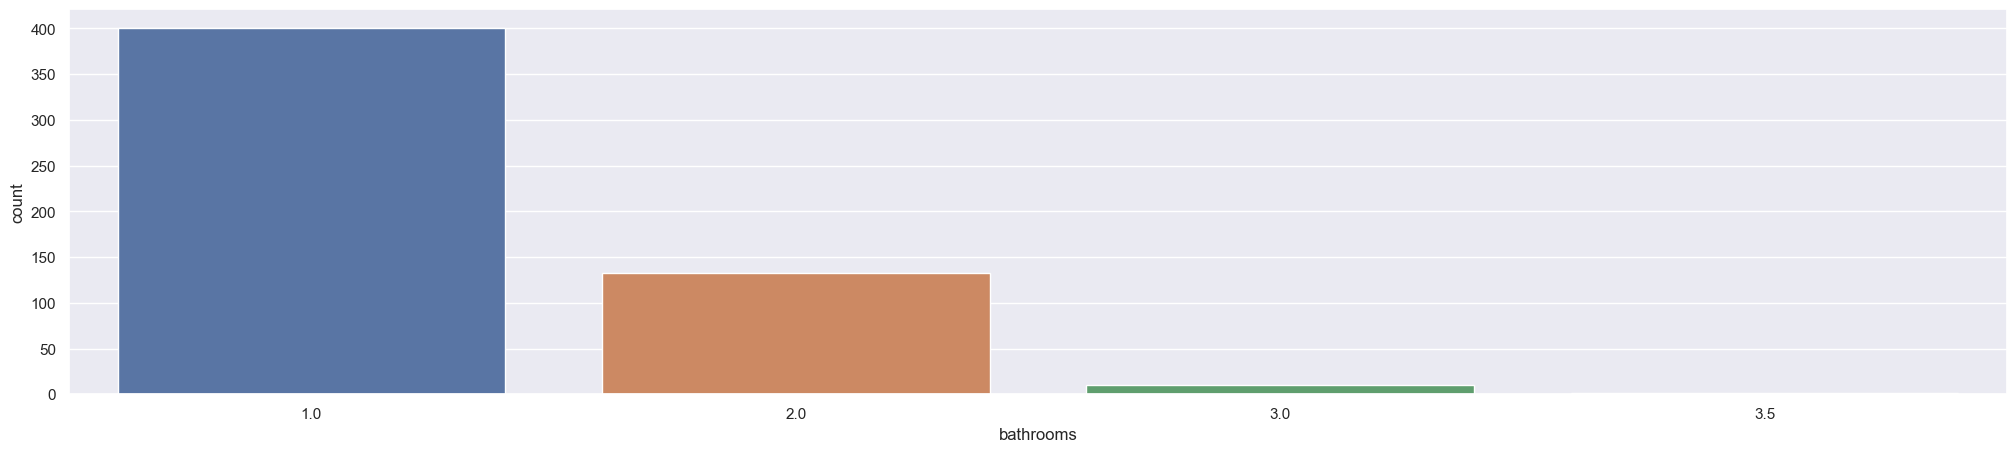

In [282]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.bathrooms.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="bathrooms")
plt.show

2.0    238
1.0    227
3.5     41
3.0     39
Name: stories, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

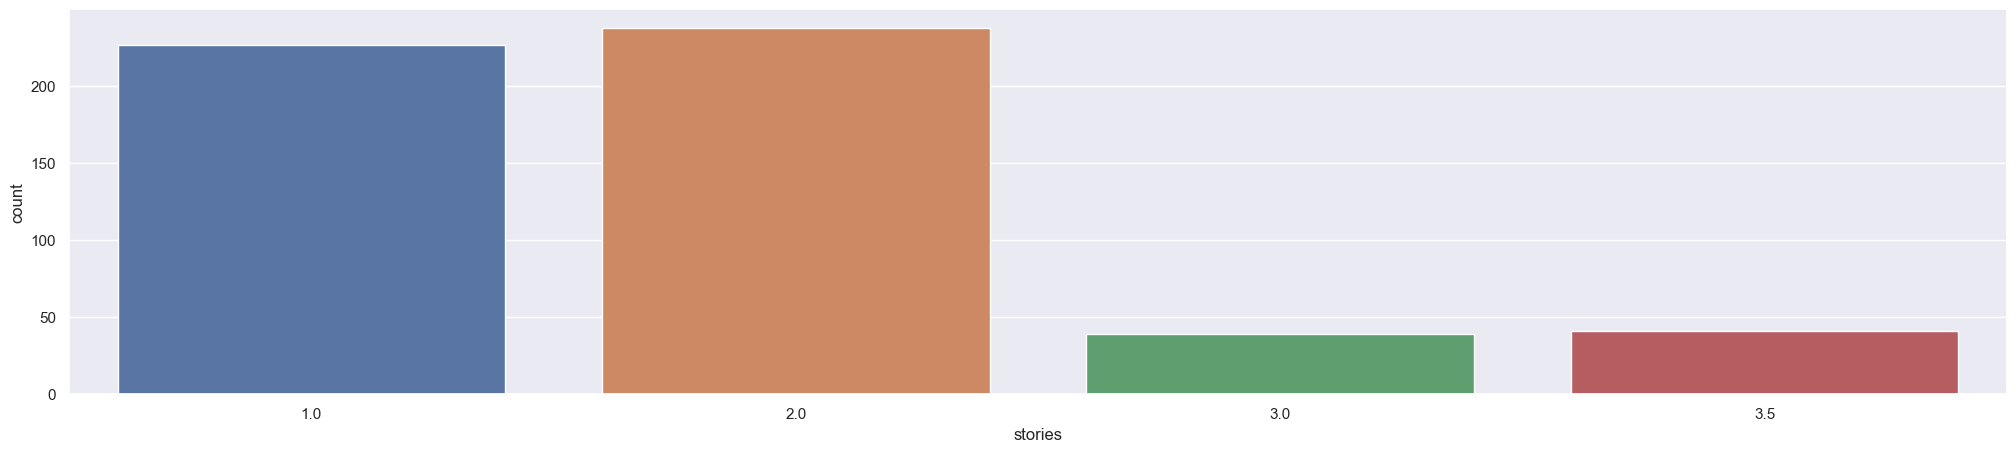

In [283]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.stories.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="stories")
plt.show

yes    468
no      77
Name: mainroad, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

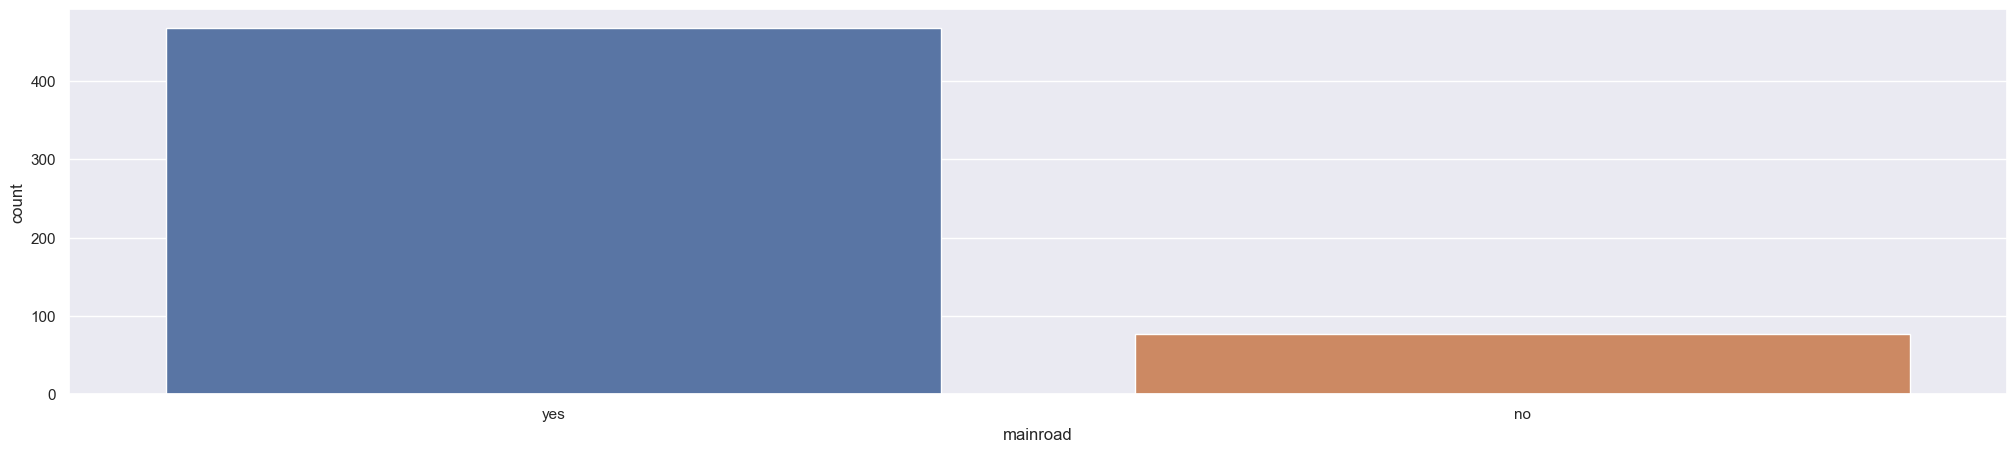

In [284]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.mainroad.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="mainroad")
plt.show

no     448
yes     97
Name: guestroom, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

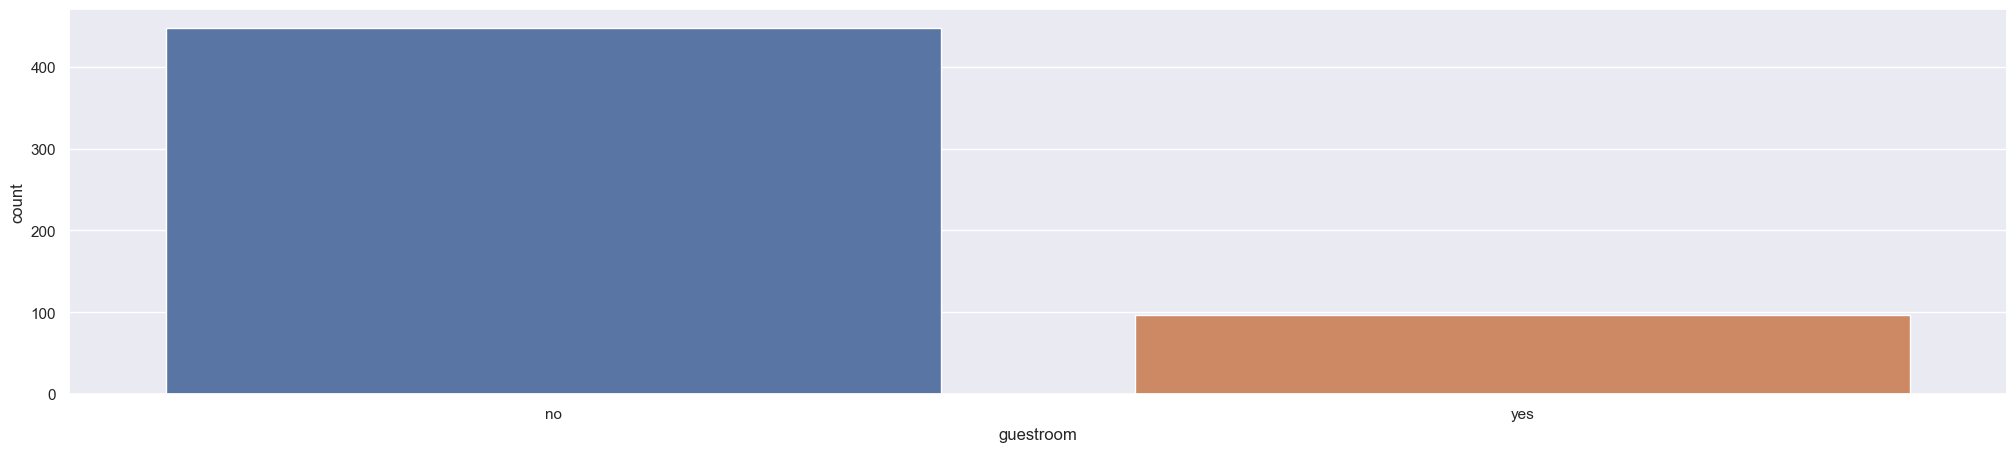

In [285]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.guestroom.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="guestroom")
plt.show

no     354
yes    191
Name: basement, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

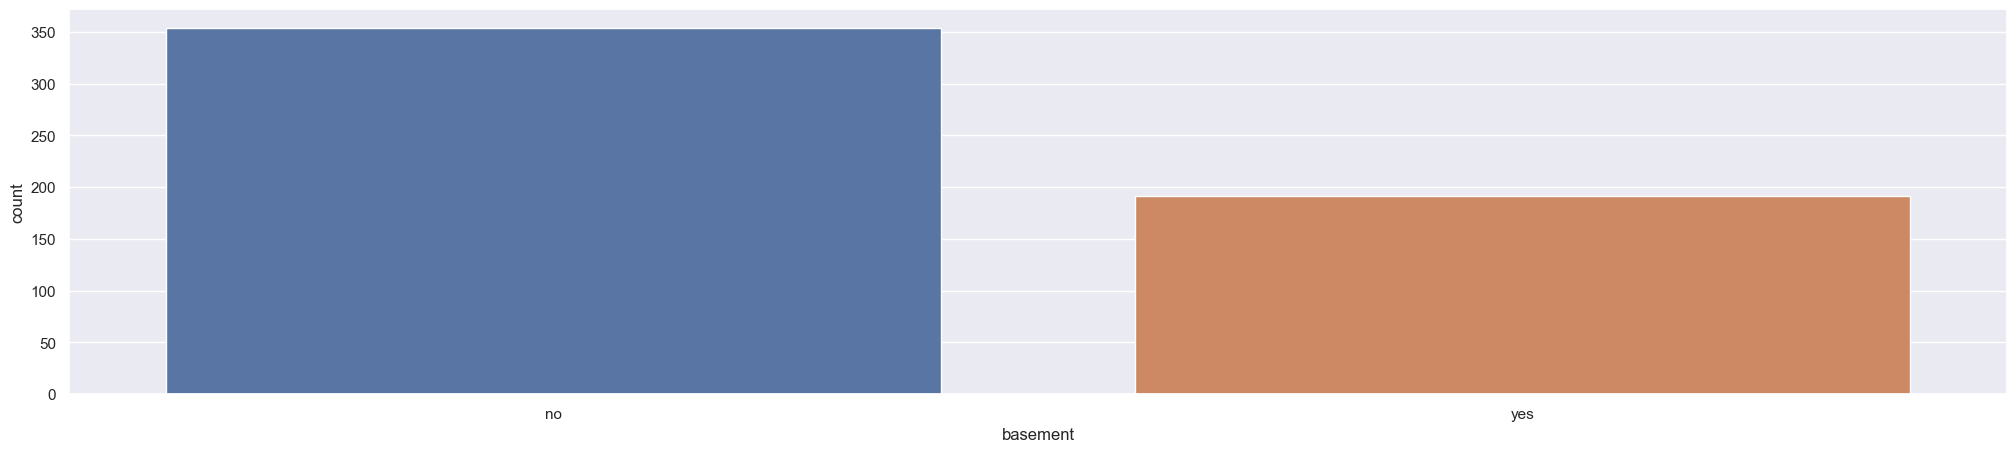

In [286]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.basement.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="basement")
plt.show

no     520
yes     25
Name: hotwaterheating, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

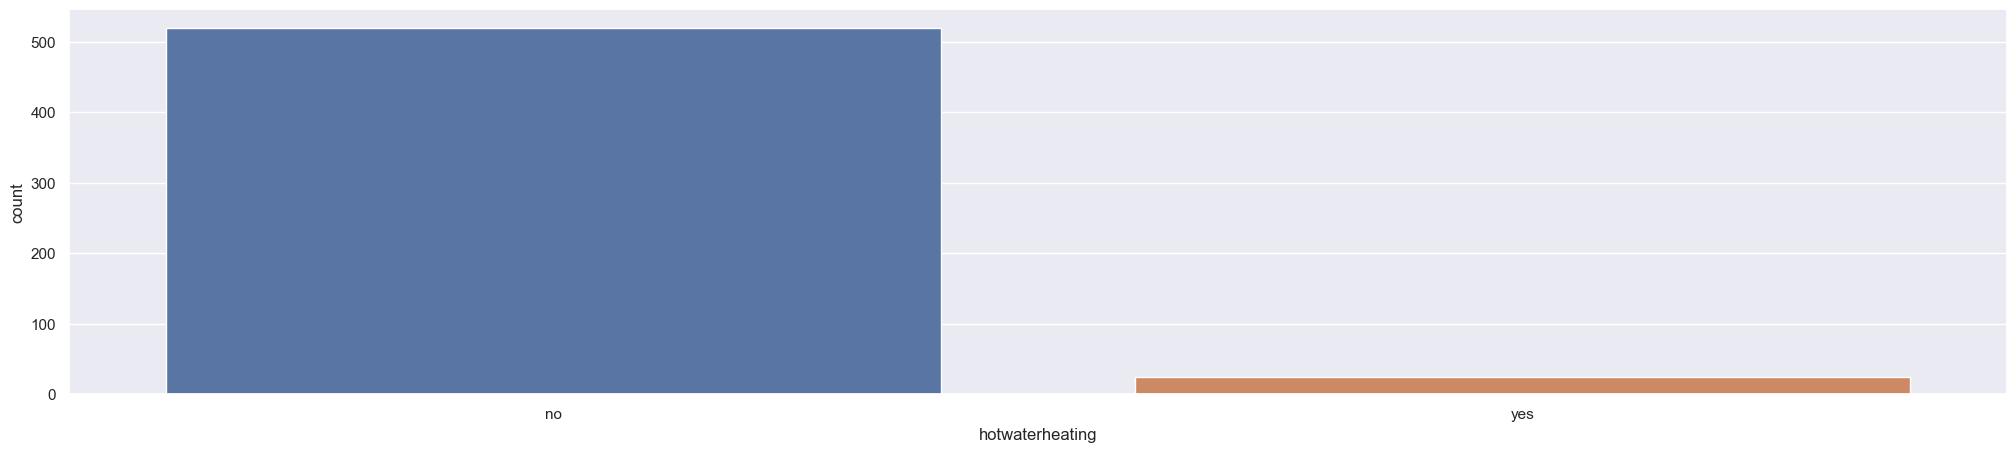

In [287]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.hotwaterheating.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="hotwaterheating")
plt.show

no     373
yes    172
Name: airconditioning, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

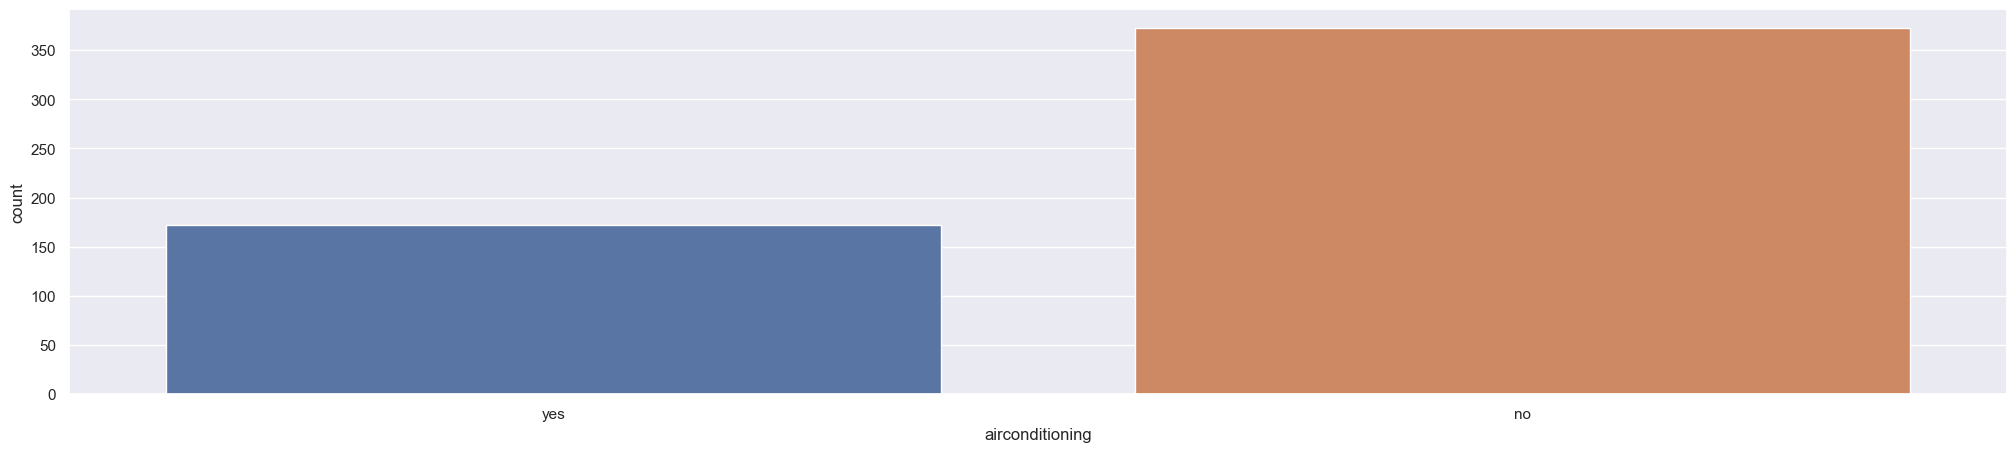

In [288]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.airconditioning.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="airconditioning")
plt.show

0.0    299
1.0    126
2.0    108
2.5     12
Name: parking, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

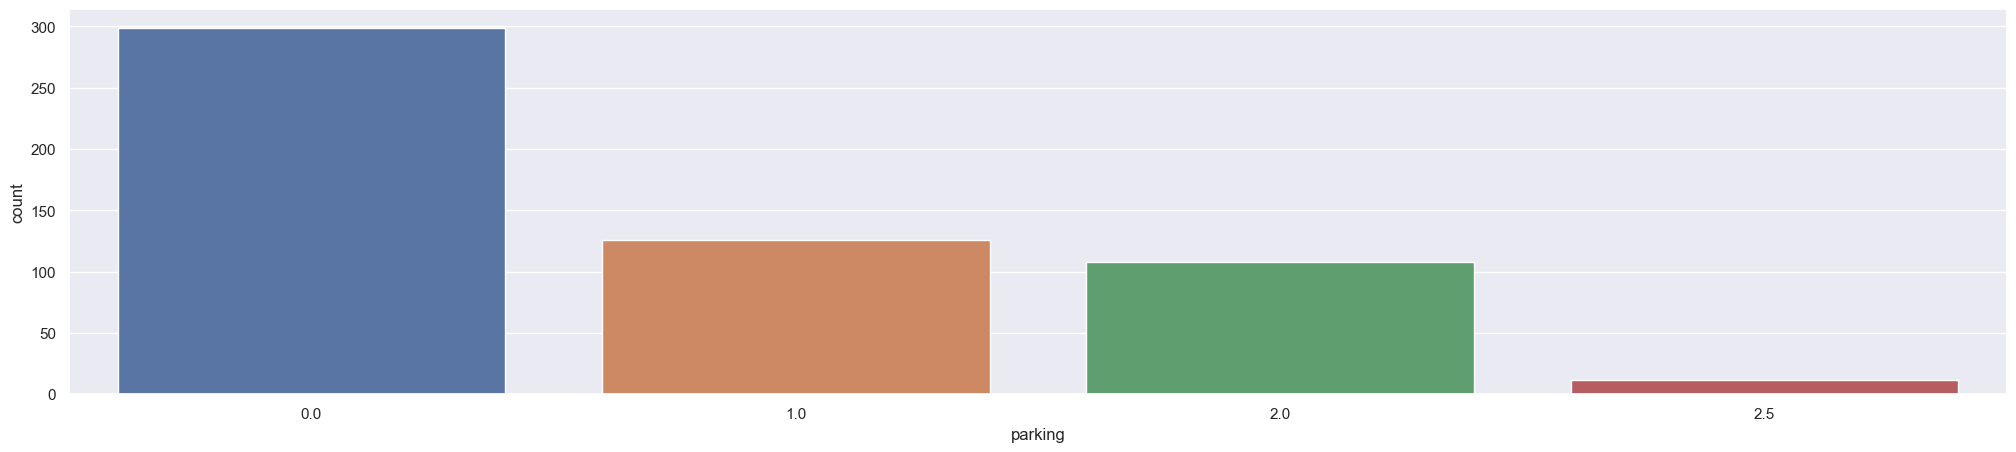

In [289]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.parking.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="parking")
plt.show

no     417
yes    128
Name: prefarea, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

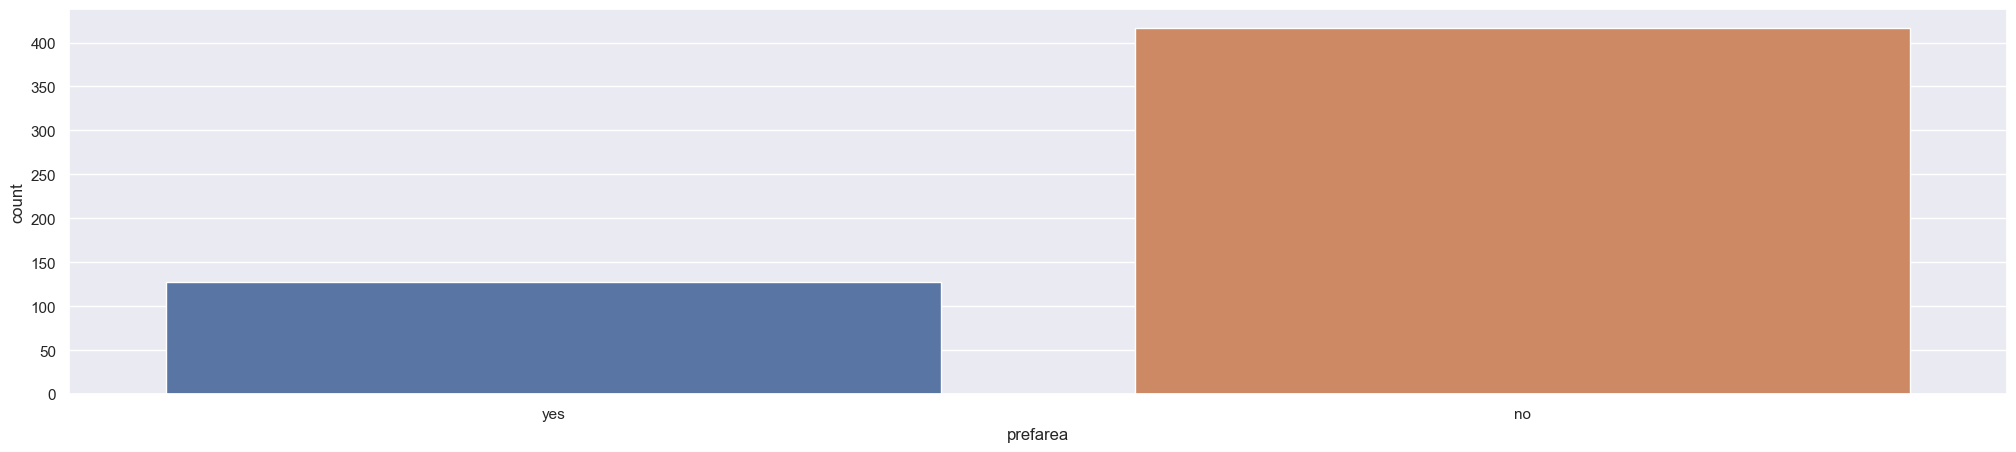

In [290]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.prefarea.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="prefarea")
plt.show

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

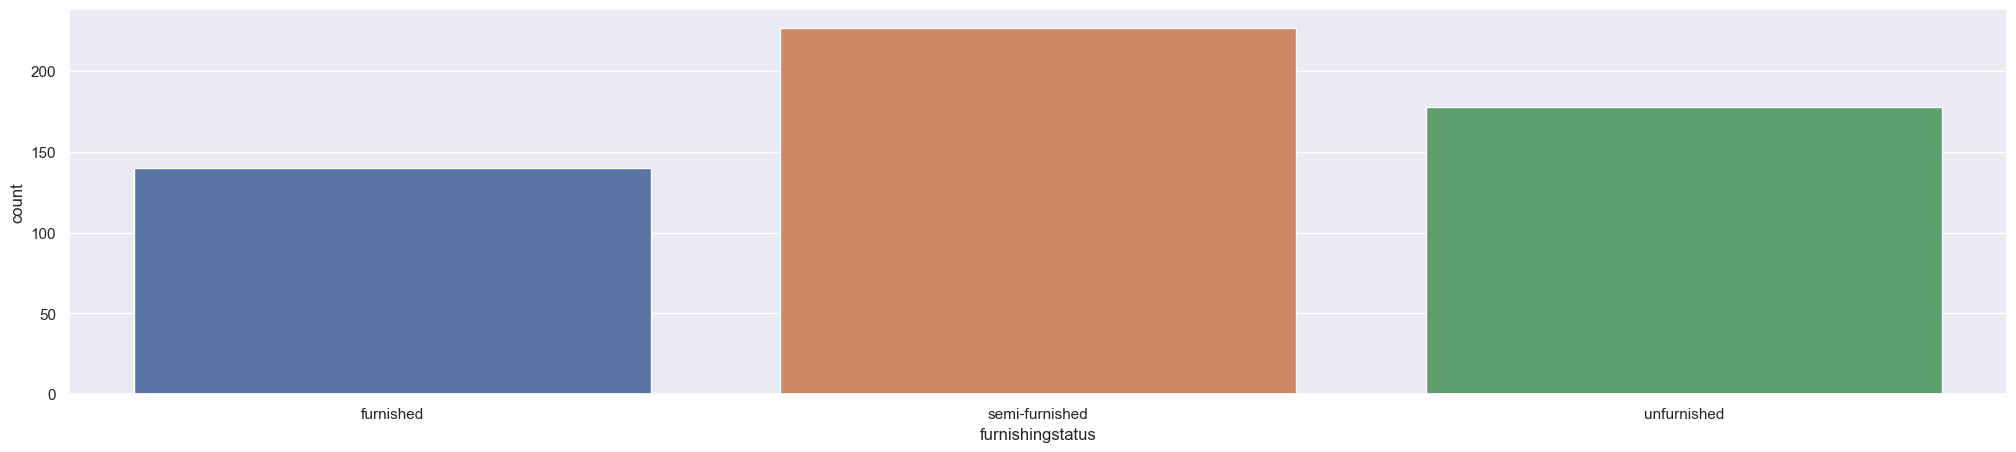

In [291]:
fig = plt.figure(figsize=(25,5))
gs = fig.add_gridspec(1,1)
print(df.furnishingstatus.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df, x="furnishingstatus")
plt.show

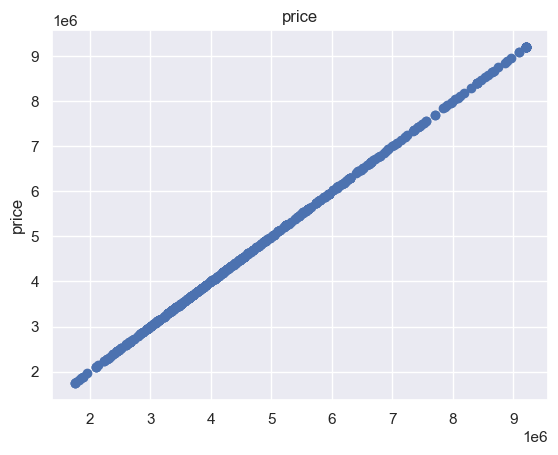

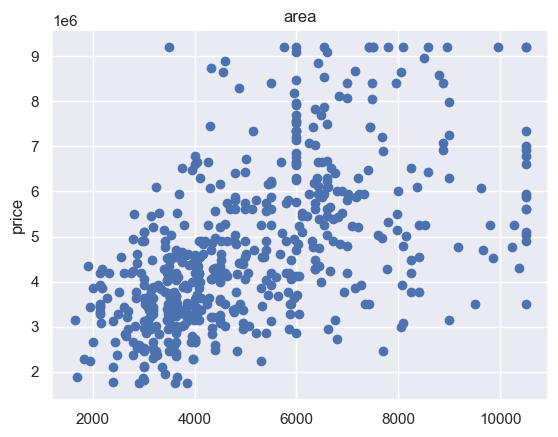

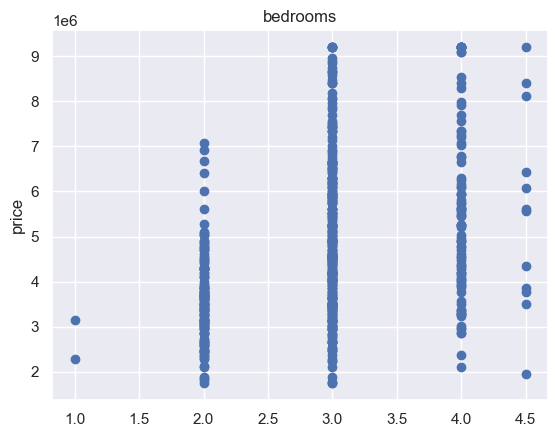

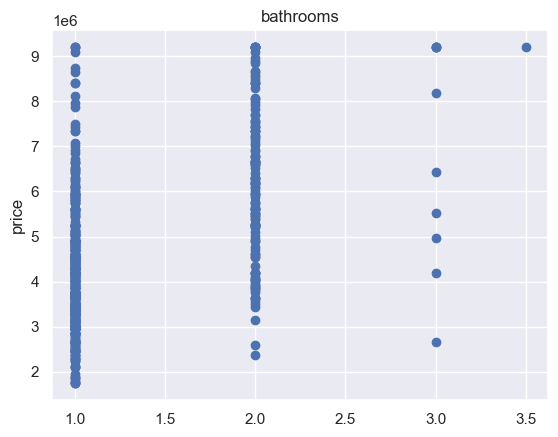

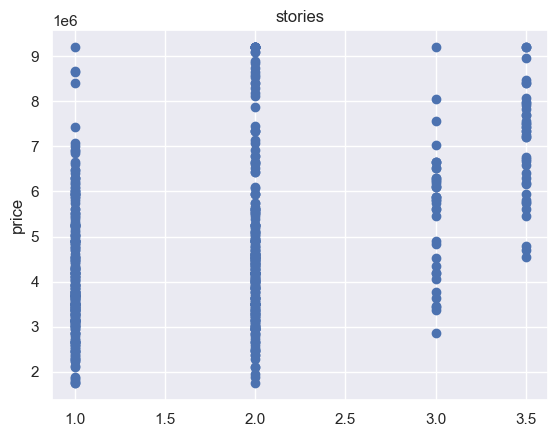

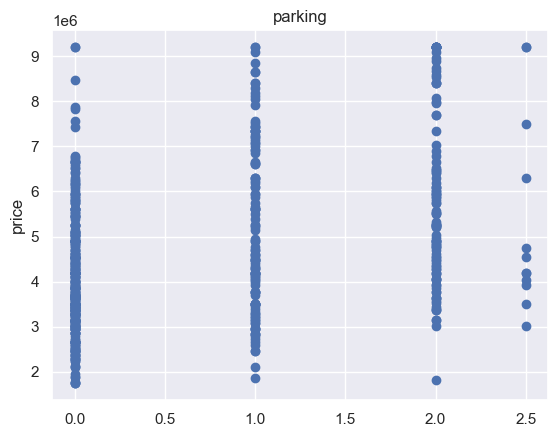

In [292]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

for numeric in BM_num[num[:11]]:
    plt.scatter(BM_num[numeric], BM_num['price'])
    plt.title(numeric)
    plt.ylabel('price')
    plt.show()

In [293]:
ord_enc = OrdinalEncoder()
df["furnishingstatus_code"] = ord_enc.fit_transform(df[["furnishingstatus"]])
df[["furnishingstatus", "furnishingstatus_code"]].head(5)

,furnishingstatus,furnishingstatus_code
0,furnished,0.0
1,furnished,0.0
2,semi-furnished,1.0
3,furnished,0.0
4,furnished,0.0


In [294]:
ord_enc = OrdinalEncoder()
df["prefarea_code"] = ord_enc.fit_transform(df[["prefarea"]])
df[["prefarea", "prefarea_code"]].head(5)

,prefarea,prefarea_code
0,yes,1.0
1,no,0.0
2,yes,1.0
3,yes,1.0
4,no,0.0


In [295]:
ord_enc = OrdinalEncoder()
df["airconditioning_code"] = ord_enc.fit_transform(df[["airconditioning"]])
df[["airconditioning", "airconditioning_code"]].head(5)

,airconditioning,airconditioning_code
0,yes,1.0
1,yes,1.0
2,no,0.0
3,yes,1.0
4,yes,1.0


In [296]:
ord_enc = OrdinalEncoder()
df["hotwaterheating_code"] = ord_enc.fit_transform(df[["hotwaterheating"]])
df[["hotwaterheating", "hotwaterheating_code"]].head(5)

,hotwaterheating,hotwaterheating_code
0,no,0.0
1,no,0.0
2,no,0.0
3,no,0.0
4,no,0.0


In [297]:
ord_enc = OrdinalEncoder()
df["mainroad_code"] = ord_enc.fit_transform(df[["mainroad"]])
df[["mainroad", "mainroad_code"]].head(5)

,mainroad,mainroad_code
0,yes,1.0
1,yes,1.0
2,yes,1.0
3,yes,1.0
4,yes,1.0


In [298]:
ord_enc = OrdinalEncoder()
df["basement_code"] = ord_enc.fit_transform(df[["basement"]])
df[["basement", "basement_code"]].head(5)

,basement,basement_code
0,no,0.0
1,no,0.0
2,yes,1.0
3,yes,1.0
4,yes,1.0


In [299]:
ord_enc = OrdinalEncoder()
df["guestroom_code"] = ord_enc.fit_transform(df[["guestroom"]])
df[["guestroom", "guestroom_code"]].head(5)

,guestroom,guestroom_code
0,no,0.0
1,no,0.0
2,no,0.0
3,no,0.0
4,yes,1.0


In [300]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'furnishingstatus_code',
       'prefarea_code', 'airconditioning_code', 'hotwaterheating_code',
       'mainroad_code', 'basement_code', 'guestroom_code'],
      dtype='object')

In [301]:
df=df.drop(['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'mainroad', 'prefarea', 'furnishingstatus'],axis=1)

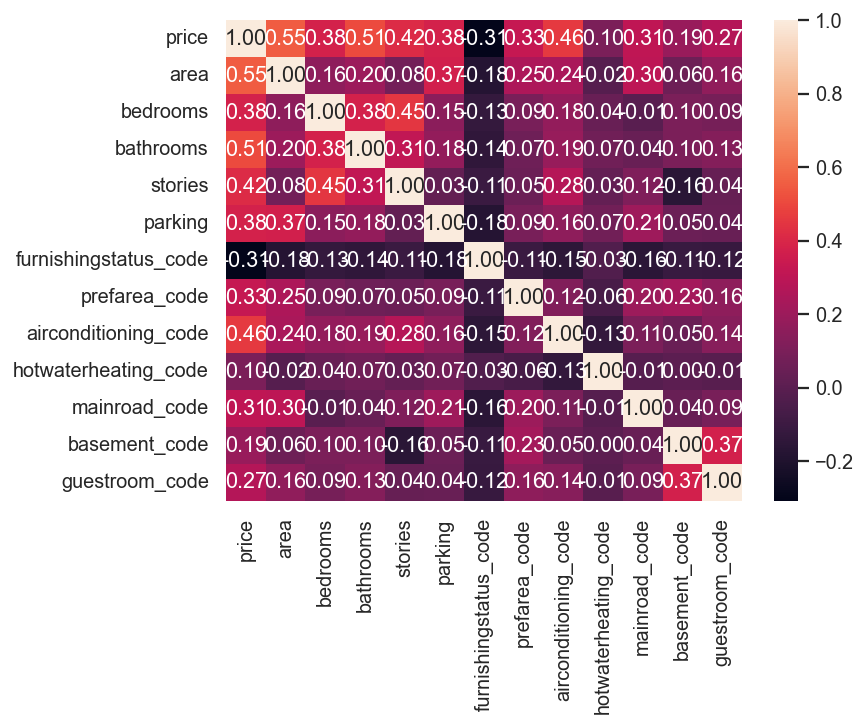

In [302]:
#plotting the correlation matrix
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [303]:
train_df=df[:1087]
test_df=df[1087:]
X = train_df.drop('price', axis=1)
y = train_df['price']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size = 0.2,random_state=200)
print(" X_train dataset: ", X_train_df.shape)
print(" y_train dataset: ", y_train_df.shape)
print(" X_test dataset: ", X_test_df.shape)
print(" y_test dataset: ", y_test_df.shape)

 X_train dataset:  (436, 12)
 y_train dataset:  (436,)
 X_test dataset:  (109, 12)
 y_test dataset:  (109,)


In [304]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_code,prefarea_code,airconditioning_code,hotwaterheating_code,mainroad_code,basement_code,guestroom_code
0,9205000,7420,4.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,9205000,8960,4.0,3.5,3.5,2.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,9205000,9960,3.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,9205000,7500,4.0,2.0,2.0,2.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,9205000,7420,4.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [305]:
models = [LinearRegression()]
scores = []

for model in models:
   
    model.fit(X_train_df, y_train_df)
    predicted = model.predict(X_test_df)
    scores.append({'Model': type(model).__name__, 'Scores' : model.score(X_test_df,y_test_df)})

Score_Train = pd.DataFrame(scores)

print(Score_Train)

              Model    Scores
0  LinearRegression  0.676664


In [306]:
print (model.score(X_train_df, y_train_df))
print(model.score(X_test_df, y_test_df))

0.6908376247949761
0.6766638412484348


In [309]:
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train_df, y_train_df)
    pred = lr.predict(x_test_df)
    r2 = r2_score(y_test_df, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.7882613549044698 on Random State 820
